# Prediction using Unsupervised ML


**Objective** - From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

**K means clustering**

K-means clustering algorithm computes the centroids and iterates until we it finds optimal centroid. It assumes that the number of clusters are already known. It is also called flat clustering algorithm. The number of clusters identified from data by algorithm is represented by 'K' in K-means.

**Dataset** - [Iris dataset](https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view)

You can get the dataset from the above link or from the library available in colab which is datasets which is a part of the sklearn library

Performed by - Darshan Jain

By - GRIP @ The Sparks Foundation

In [9]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [25]:
#importing the dataset
iris_df=pd.read_csv("/content/Irisdataset.csv")
print("Data was imported succesfully and converted into a pandas Dataframe")

Data was imported succesfully and converted into a pandas Dataframe


In [26]:
#printing the data
iris_df.head(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
iris_df.shape

(150, 6)

**EDA** - Exploratary Data Analysis

In [28]:
#lets get some information about our data and check if there are any null values 
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
# dropping Id column

iris_df.drop('Id', axis=1, inplace=True)
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [32]:
## drop duplicate rows

iris_df.drop_duplicates(inplace=True)  

iris_df.shape[0]  # gives number of rows. Similarly, data.shape[1] will give number of columns

## now number of rows left 147, earlier there were 150 rows.

147

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


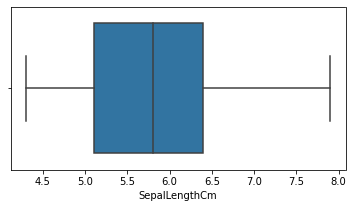

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


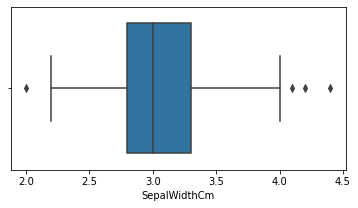

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


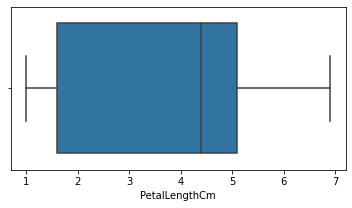

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


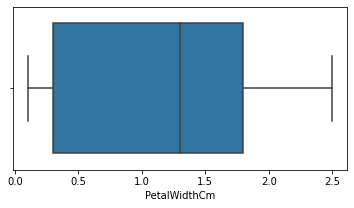

In [33]:
## Check for any outliers in the numeric data
for i in iris_df.columns:
    if iris_df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(iris_df[i])
        plt.show()

In [34]:
## Treating outliers present in the SepalWidthCm column

q1,q3 = np.percentile(iris_df['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
iris_df['SepalWidthCm'] = iris_df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


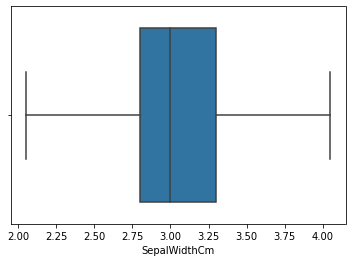

In [36]:
sns.boxplot(iris_df['SepalWidthCm']);

In [38]:
iris_df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [39]:
iris_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
## Correlation Matrix

iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


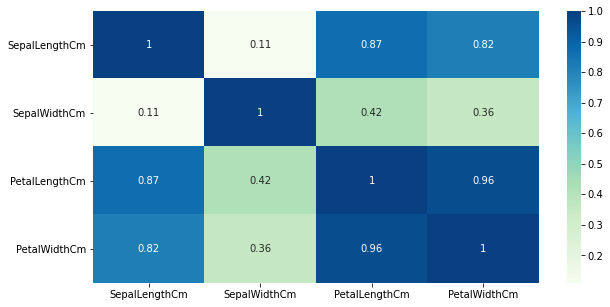

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(iris_df.corr()), cmap='GnBu', annot=True);

#K-means clustering


In [48]:
from sklearn.cluster import KMeans

In [50]:
SSE = []
for i in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
    kmeans.fit(iris_df.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

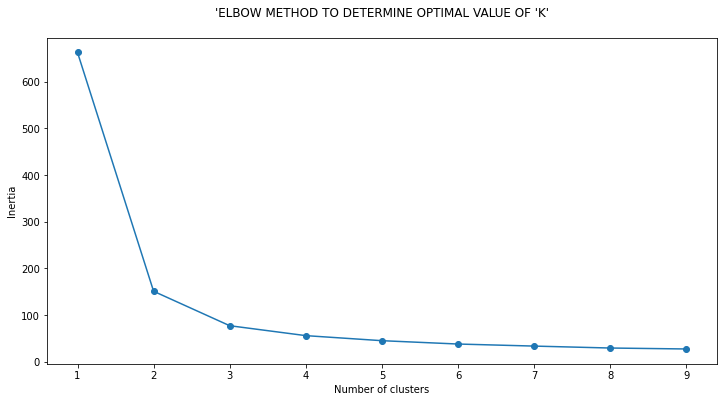

In [51]:
df = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'], df['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n");

In [53]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(iris_df.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [5.90327869, 2.75      , 4.38196721, 1.42622951],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [54]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [56]:
iris_df['cluster'] = kmeans.labels_

iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [57]:
display(iris_df['cluster'].value_counts(), iris_df['Species'].value_counts())

1    61
0    48
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

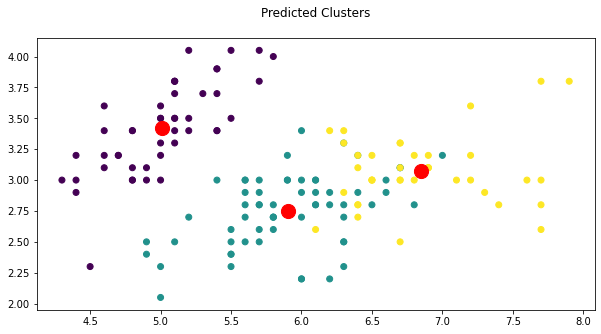

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'], c=iris_df.cluster)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=200, c='red', label = 'Centroids')
plt.show()